# Exercise 2
In a solar panel efficiency study, researchers want to investigate the relationship between the temperature and the efficiency of solar panels. They collected data on the temperature (in Celsius) and the corresponding efficiency (in percentage) of solar panels over a period of time. The dataset contains measurements from 50 different days.
1. Using Simple Linear Regression, can you develop a model to predict the efficiency of solar panels based on the temperature?
2. Perform an F-test to determine whether temperature significantly predicts the efficiency of solar panels.
3. Conduct a t-test to assess the significance of the regression coefficient for temperature.


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [62]:
df = pd.read_csv("solar_efficiency_temp.csv")
df.head()

,temperature,efficiency
0,27.440675,65.188987
1,35.759468,87.633611
2,30.138169,72.520823
3,27.244159,71.431708
4,21.182740,64.327393


In [63]:
X = df[['temperature']]
y = df['efficiency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [64]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred = model.predict(X_test)

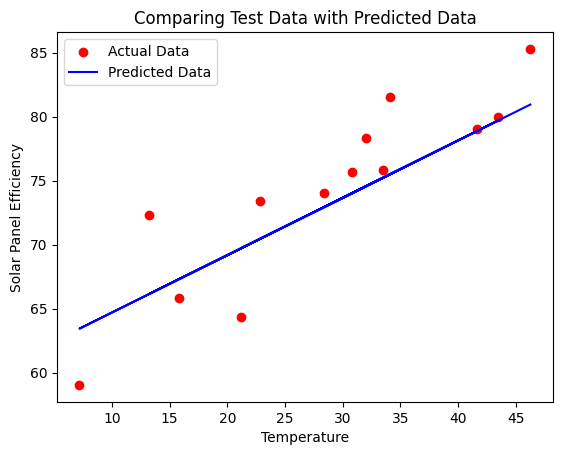

In [66]:
plt.title("Comparing Test Data with Predicted Data")
plt.xlabel("Temperature")
plt.ylabel("Solar Panel Efficiency")
plt.scatter(X_test, y_test, color="r", label="Actual Data")
plt.plot(X_test, y_pred, color="b", label="Predicted Data")
plt.legend()

In [67]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error = {mse}\nr^2 = {r2}")

Mean Squared Error = 13.184913541739215
r^2 = 0.7385465712906308


2. Perform an F-test to determine whether temperature significantly predicts the efficiency of solar panels.
3. Conduct a t-test to assess the significance of the regression coefficient for temperature.

In [68]:
import statsmodels.api as sm

In [69]:
X = sm.add_constant(df[['temperature']])
Y = df['efficiency']

model = sm.OLS(Y, X).fit()

In [70]:
t_statistic = model.tvalues['temperature']
p_value_t = model.pvalues['temperature']

f_statistic = model.fvalue
p_value_f = model.f_pvalue

print(f"F-statistic = {f_statistic}\nt-statistic = {t_statistic}")

if p_value_t < 0.05:
    print("The regression coefficient for temperature is statistically significant.")
else:
    print("The regression coefficient for temperature is NOT statistically significant.")

if p_value_t < 0.05:
    print("The temperature significantly predicts the efficiency of solar panels.")
else:
    print("The temperature does NOT significantly predicts the efficiency of solar panels.")

F-statistic = 91.58938851225089
t-statistic = 9.570234506648786
The regression coefficient for temperature is statistically significant.
The temperature significantly predicts the efficiency of solar panels.
